In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

from scipy import interp

ImportError: No module named imblearn.over_sampling

In [3]:
data = pd.read_csv("34933-0001-Data.tsv", sep = '\t')

In [6]:
var = ['MJEVER','CADRLAST', 'IRHHSIZ2', 'IRKI17_2', 'IRHH65_2', 'IMOTHER', 'IFATHER', 
       'GOVTPROG', 'INCOME', 'YMDELT', 'YSDSOVRL', 'ANYHLTI2', 'CATAG7', 'HEALTH2', 
       'IRSEX', 'NEWRACE2', 'MOVESPY2', 'SCHENRL', 'SCHDSICK', 'SCHDSKIP'
       ,'WRKHAVJB','YESCHFLT','YELSTGRD', 'YEYFGTSW', 'YEYARGUP', 'YEPMJEVR', 'YEPRBSLV','YEDERGLR', 
        'YUMHCRYR', 'YUTPSTYR', 'YUSCEMYR']

In [7]:
len(var)

31

In [12]:
data = data.loc[data['CATAG7']<4, var]
# MJEVER 1.yes 2.no
data = data.loc[data['MJEVER']<3]

In [13]:
#drink time in past 30 days 0-30
data.loc[data['CADRLAST']==991, 'CADRLAST'] = 0 #never used alcohol
data.loc[data['CADRLAST']==993, 'CADRLAST'] = 0 #did not use alcohol in past 30
data.loc[data['CADRLAST']==985, 'CADRLAST'] = np.nan # bad data
data.loc[data['CADRLAST']==994, 'CADRLAST'] = np.nan #dont know 
data.loc[data['CADRLAST']==997, 'CADRLAST'] = np.nan #refused
data.loc[data['CADRLAST']==998, 'CADRLAST'] = np.nan #blank
data['CADRLAST'] = data['CADRLAST'].fillna(data['CADRLAST'].mean()) #all filled with mean

In [14]:
# don't know whether father/mother is in household
#1.yes 2.no
data.loc[data['IMOTHER']==3, 'IMOTHER'] = np.nan # dont know
data.loc[data['IFATHER']==3, 'IFATHER'] = np.nan
data['IMOTHER'] = data['IMOTHER'].fillna(data['IMOTHER'].mode().loc[0])
data['IFATHER'] = data['IFATHER'].fillna(data['IFATHER'].mode().loc[0])

In [15]:
# lifetime major depressive episode
# 1.yes 2.no
data.loc[data['YMDELT']==-9, 'YMDELT'] = np.nan # UNKNOWN
data['YMDELT'] = data['YMDELT'].fillna(data['YMDELT'].mode().loc[0])

In [16]:
# severity level of med role impairment
#1.none 2.mild 3.moderate 4. severe 5.very severe
data.loc[data['YSDSOVRL']==-9, 'YSDSOVRL'] = 1 #unkown
data['YSDSOVRL'] = data['YSDSOVRL'].fillna(data['YSDSOVRL'].mode().loc[0])

In [17]:
#covered by any health insurance 1.yes 2.no
data.loc[data['ANYHLTI2']==94, 'ANYHLTI2'] = np.nan #dont know
data.loc[data['ANYHLTI2']==97, 'ANYHLTI2'] = np.nan #refused
data.loc[data['ANYHLTI2']==98, 'ANYHLTI2'] = np.nan #other missing (few)
data['ANYHLTI2'] = data['ANYHLTI2'].fillna(data['ANYHLTI2'].mode().loc[0])

In [18]:
# health condition 1.excellet 2.very good 3.good 4.fair
data.loc[data['HEALTH2']==-9, 'HEALTH2'] = np.nan #UNKNOWN
data['HEALTH2'] = data['HEALTH2'].fillna(data['HEALTH2'].mode().loc[0])

In [19]:
# time moved past 12 month 0,1,2,3
data.loc[data['MOVESPY2']==994, 'MOVESPY2'] = np.nan
data.loc[data['MOVESPY2']==997, 'MOVESPY2'] = np.nan
data.loc[data['MOVESPY2']==998, 'MOVESPY2'] = np.nan
data['MOVESPY2'] = data['MOVESPY2'].fillna(data['MOVESPY2'].mode().loc[0])

In [20]:
#now enrolled in any school 1.yes 2.no
data.loc[data['SCHENRL']==11, 'SCHENRL'] = 1

In [21]:
# miss school from sick 0-30
data.loc[data['SCHDSICK']==90, 'SCHDSICK'] = np.nan
data.loc[data['SCHDSICK']==94, 'SCHDSICK'] = np.nan
data.loc[data['SCHDSICK']==97, 'SCHDSICK'] = np.nan
data.loc[data['SCHDSICK']==98, 'SCHDSICK'] = np.nan
data.loc[data['SCHDSICK']==99, 'SCHDSICK'] = np.nan
data['SCHDSICK'] = data['SCHDSICK'].fillna(data['SCHDSICK'].mean())

In [22]:
# miss school because of skipping 0-30
data.loc[data['SCHDSKIP']==94, 'SCHDSKIP'] = np.nan
data.loc[data['SCHDSKIP']==97, 'SCHDSKIP'] = np.nan
data.loc[data['SCHDSKIP']==98, 'SCHDSKIP'] = np.nan
data.loc[data['SCHDSKIP']==99, 'SCHDSKIP'] = np.nan
data['SCHDSKIP'] = data['SCHDSKIP'].fillna(data['SCHDSKIP'].mean())

In [23]:
a = 1831
b = 4862
c = 1096
d = 9007
a_e = (a+c)*(a+b)/(a+b+c+d)
b_e = a+b-a_e
c_e = (a+c)*(c+d)/(a+b+c+d)
d_e = c+d-c_e
chisquare([a,b,c,d], f_exp=[a_e,b_e,c_e,d_e])

Power_divergenceResult(statistic=762.63379358666418, pvalue=5.493413636929348e-165)

In [24]:
# whether have a job 1.yes 2.no 99. legitimate skip
data.loc[data['WRKHAVJB']==99, 'WRKHAVJB'] = 99
data.loc[data['WRKHAVJB']==94, 'WRKHAVJB'] = 2
data.loc[data['WRKHAVJB']==97, 'WRKHAVJB'] = 2
data.loc[data['WRKHAVJB']==98, 'WRKHAVJB'] = 2

In [25]:
a = 1366
b = 6650
c = 84
d = 832
a_e = (a+c)*(a+b)/(a+b+c+d)
b_e = a+b-a_e
c_e = (a+c)*(c+d)/(a+b+c+d)
d_e = c+d-c_e
chisquare([a,b,c,d], f_exp=[a_e,b_e,c_e,d_e])

Power_divergenceResult(statistic=36.885699314822226, pvalue=4.8648563915487467e-08)

In [26]:
# like to go to school 1.like a lot 2.kind of like 
# 3.didn't like 4.hate
data.loc[data['YESCHFLT']==85, 'YESCHFLT'] = 2 #bad data
data.loc[data['YESCHFLT']==94, 'YESCHFLT'] = 2 #dont known
data.loc[data['YESCHFLT']==97, 'YESCHFLT'] = 2 #refused
data.loc[data['YESCHFLT']==98, 'YESCHFLT'] = 2 #blank
data.loc[data['YESCHFLT']==99, 'YESCHFLT'] = 99 #legitmate skip

In [27]:
a = 1146
b = 5416
c = 84
d = 832
a_e = (a+c)*(a+b)/(a+b+c+d)
b_e = a+b-a_e
c_e = (a+c)*(c+d)/(a+b+c+d)
d_e = c+d-c_e
chisquare([a,b,c,d], f_exp=[a_e,b_e,c_e,d_e])

Power_divergenceResult(statistic=39.705730099099938, pvalue=1.230066566937335e-08)

In [28]:
# GPA 1.A 2.B 3.C 4.D
data.loc[data['YELSTGRD']==5, 'YELSTGRD'] = 2 #don't give these grads
data.loc[data['YELSTGRD']==85, 'YELSTGRD'] = 2 #bad data
data.loc[data['YELSTGRD']==94, 'YELSTGRD'] = 2 #dont know
data.loc[data['YELSTGRD']==97, 'YELSTGRD'] = 2 #refused
data.loc[data['YELSTGRD']==98, 'YELSTGRD'] = 2 #blank
data.loc[data['YELSTGRD']==99, 'YELSTGRD'] = 99 #legitomate skip

In [29]:
# serious fight 1.0 2.1-2 3.3-5 4.6-9 5.>10
data.loc[data['YEYFGTSW']==85, 'YEYFGTSW'] = np.nan #BAD DATA
data.loc[data['YEYFGTSW']==94, 'YEYFGTSW'] = np.nan #dont know
data.loc[data['YEYFGTSW']==97, 'YEYFGTSW'] = np.nan #refused
data['YEYFGTSW'] = data['YEYFGTSW'].fillna(data['YEYFGTSW'].mode().loc[0])

In [30]:
# fight with parents 1.0 2.1-2 3.3-5 4.6-9 5.>10
data.loc[data['YEYARGUP']==85, 'YEYARGUP'] = np.nan #bad data
data.loc[data['YEYARGUP']==94, 'YEYARGUP'] = np.nan #dont know
data.loc[data['YEYARGUP']==97, 'YEYARGUP'] = np.nan #refused
data['YEYARGUP'] = data['YEYARGUP'].fillna(data['YEYARGUP'].mode().loc[0])

In [31]:
# parent attitude 1.whatever 2.somewhat dsiapprove 3.stongly disapprove
data.loc[data['YEPMJEVR']==85, 'YEPMJEVR'] = np.nan #bad data
data.loc[data['YEPMJEVR']==94, 'YEPMJEVR'] = np.nan # dont know
data.loc[data['YEPMJEVR']==97, 'YEPMJEVR'] = np.nan #refused
data['YEPMJEVR'] = data['YEPMJEVR'].fillna(data['YEPMJEVR'].mode().loc[0])

In [32]:
# communication group 1.yes 2.no
data.loc[data['YEPRBSLV']==85, 'YEPRBSLV'] = np.nan #bad data
data.loc[data['YEPRBSLV']==94, 'YEPRBSLV'] = np.nan #dont know
data.loc[data['YEPRBSLV']==97, 'YEPRBSLV'] = np.nan #refused
data['YEPRBSLV'] = data['YEPRBSLV'].fillna(data['YEPRBSLV'].mode().loc[0])

In [33]:
a = 1771
b = 8825
c = 84
d = 832
a_e = (a+c)*(a+b)/(a+b+c+d)
b_e = a+b-a_e
c_e = (a+c)*(c+d)/(a+b+c+d)
d_e = c+d-c_e
chisquare([a,b,c,d], f_exp=[a_e,b_e,c_e,d_e])

Power_divergenceResult(statistic=35.021573956119212, pvalue=1.2055308729300419e-07)

In [34]:
#info about drug 1.yes 2.no
data.loc[data['YEDERGLR']==85, 'YEDERGLR'] = np.nan #bad data
data.loc[data['YEDERGLR']==94, 'YEDERGLR'] = np.nan #dont know
data.loc[data['YEDERGLR']==97, 'YEDERGLR'] = np.nan #refused
data.loc[data['YEDERGLR']==98, 'YEDERGLR'] = np.nan #blank
data.loc[data['YEDERGLR']==99, 'YEDERGLR'] = np.nan #legimate skip
data['YEDERGLR'] = data['YEDERGLR'].fillna(data['YEDERGLR'].mode().loc[0])

In [35]:
#emotional problems 1.yes 2.no
data.loc[data['YUMHCRYR']==94, 'YUMHCRYR'] = np.nan  #dont know
data.loc[data['YUMHCRYR']==97, 'YUMHCRYR'] = np.nan  #refused
data.loc[data['YUMHCRYR']==85, 'YUMHCRYR'] = np.nan  #bad data
data['YUMHCRYR'] = data['YUMHCRYR'].fillna(data['YUMHCRYR'].mode().loc[0])

In [36]:
# trt for emotional problem 1.yes 2.no
data.loc[data['YUTPSTYR']==94, 'YUTPSTYR'] = np.nan #dont know
data.loc[data['YUTPSTYR']==97, 'YUTPSTYR'] = np.nan #refused 
data.loc[data['YUTPSTYR']==85, 'YUTPSTYR'] = np.nan #bad data
data['YUTPSTYR'] = data['YUTPSTYR'].fillna(data['YUTPSTYR'].mode().loc[0])

In [37]:
a = 2821
b = 12765
c = 92
d = 904
a_e = (a+c)*(a+b)/(a+b+c+d)
b_e = a+b-a_e
c_e = (a+c)*(c+d)/(a+b+c+d)
d_e = c+d-c_e
chisquare([a,b,c,d], f_exp=[a_e,b_e,c_e,d_e])

Power_divergenceResult(statistic=49.875989350385183, pvalue=8.4900821961765885e-11)

In [38]:
# attend emotional problem school 1.yes 2.no
data.loc[data['YUSCEMYR']==85, 'YUSCEMYR'] = 2
data.loc[data['YUSCEMYR']==89, 'YUSCEMYR'] = 2
data.loc[data['YUSCEMYR']==94, 'YUSCEMYR'] = 2
data.loc[data['YUSCEMYR']==97, 'YUSCEMYR'] = 2
data.loc[data['YUSCEMYR']==98, 'YUSCEMYR'] = 2
data.loc[data['YUSCEMYR']==99, 'YUSCEMYR'] = 99

In [39]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes

## cross validation

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import ComplementNB

best_AUC = 0
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for norm in [True, False]:
    for alpha in [1e-10, 1.0, 2.0, 3.0]:
        AUC = []
        for train_index, val_index in skf.split(X_t, y_t):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            cnb = ComplementNB(alpha=alpha, norm=norm)
            X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
            cnb.fit(X_resampled, y_resampled)
            pred = cnb.predict_proba(X_val)[:,1]
            fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
            AUC.append(metrics.auc(fpr, tpr))
        if np.mean(AUC)>best_AUC:
            best_AUC = np.mean(AUC)
            best_norm = norm
            best_alpha = alpha

ImportError: cannot import name ComplementNB

In [48]:
best_AUC

0.76799174945859661

In [ ]:
best_norm

In [ ]:
best_alphapha

## evaluation

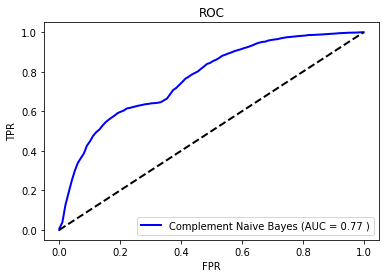

AUC: 0.7679917494585966
f1 score: 0.40249210287287546
Accuracy: 0.6495180215462083


In [52]:
import matplotlib.pyplot as plt
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
mean_fpr = np.linspace(0,1,100)
tprs = []
AUC = []
F = []
accuracy = []

for train_index, val_index in skf.split(X_t, y_t):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    cnb = ComplementNB(norm=best_norm, alpha=best_alpha)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    cnb.fit(X_resampled, y_resampled)
    pred = cnb.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
    tprs.append(interp(mean_fpr, fpr, tpr))
    AUC.append(metrics.auc(fpr, tpr))
    pred_val = cnb.predict(X_val)
    F.append(metrics.f1_score(y_val, pred_val))
    accuracy.append(metrics.accuracy_score(y_val, pred_val))
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.concatenate([[0], mean_fpr])
mean_tpr = np.concatenate([[0], mean_tpr])
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Complement Naive Bayes (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("AUC: {}".format(np.mean(AUC)))
print("f1 score: {}".format(np.mean(F)))
print("Accuracy: {}".format(np.mean(accuracy)))

# Random Forest

## cross validation

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

best_AUC = 0
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for n_estimator in [100, 200, 300, 400, 500, 600]:
    for max_depth  in [6,8,10, 12, 15]:
        for min_samples_split  in [5e-3, 0.01, 0.015, 0.02]:    
            AUC = []
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                rf = RandomForestClassifier(random_state=0, n_estimators=n_estimator, max_depth=max_depth, min_samples_split=min_samples_split)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                rf.fit(X_resampled, y_resampled)
                pred = rf.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split

In [36]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_samples_split)

0.873160685491 600 10 0.01


In [37]:
for n_estimator in [600, 650, 700]:
    for max_depth  in [6,8,10, 12, 15]:
        for min_samples_split  in [5e-3, 0.01, 0.015, 0.02]:    
            AUC = []
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                rf = RandomForestClassifier(random_state=0, n_estimators=n_estimator, max_depth=max_depth, min_samples_split=min_samples_split)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                rf.fit(X_resampled, y_resampled)
                pred = rf.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split

In [38]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_samples_split)

0.873160685491 600 10 0.01


## evaluation

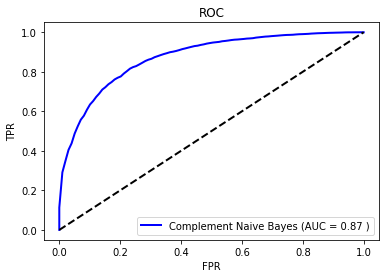

AUC: 0.8731606854913112
f1 score: 0.583340786216508
Accuracy: 0.8068853531179195


In [60]:
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
mean_fpr = np.linspace(0,1,100)
tprs = []
AUC = []
F = []
accuracy = []

for train_index, val_index in skf.split(X_t, y_t):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    rf = RandomForestClassifier(random_state=0, n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    pred = rf.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
    tprs.append(interp(mean_fpr, fpr, tpr))
    AUC.append(metrics.auc(fpr, tpr))
    pred_val = rf.predict(X_val)
    F.append(metrics.f1_score(y_val, pred_val))
    accuracy.append(metrics.accuracy_score(y_val, pred_val))
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.concatenate([[0], mean_fpr])
mean_tpr = np.concatenate([[0], mean_tpr])
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Complement Naive Bayes (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("AUC: {}".format(np.mean(AUC)))
print("f1 score: {}".format(np.mean(F)))
print("Accuracy: {}".format(np.mean(accuracy)))

# XGBoost

## cross validation

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

#fix some parameters
learning_rate =0.01
gamma = 0.1
subsample = 0.8
colsample_bytree = 0.8

best_AUC = 0
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)

for n_estimator in [200, 300, 400, 500]:
    for max_depth  in [3, 5, 7, 9]:
        for min_child_weight  in [1, 3, 5, 7]:    
            AUC = []
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator,max_depth = max_depth,min_child_weight = min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_child_weight = min_child_weight


In [34]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_child_weight)

0.874071604835 500 5 5


In [35]:
for n_estimator in [600, 700, 900]:
    for max_depth  in [3, 5, 7, 9]:
        for min_child_weight  in [1, 3, 5, 7]:    
            AUC = []
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator,max_depth = max_depth,min_child_weight = min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_child_weight = min_child_weight

In [36]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_child_weight)

0.875739734813 900 3 7


In [38]:
for n_estimator in [1000, 1200, 1400]:
    for max_depth  in [2, 3, 5, 7]:
        for min_child_weight  in [5, 7, 9]:    
            AUC = []
            print(n_estimator, max_depth, min_child_weight)
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimator,max_depth = max_depth,min_child_weight = min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Resfreshed!")
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_child_weight = min_child_weight

1000 2 5
1000 2 7
1000 2 9
1000 3 5
Resfreshed!
1000 3 7
Resfreshed!
1000 3 9
1000 5 5
1000 5 7
1000 5 9
1000 7 5
1000 7 7
1000 7 9
1200 2 5
1200 2 7
1200 2 9
1200 3 5
Resfreshed!
1200 3 7
Resfreshed!
1200 3 9
1200 5 5
1200 5 7
1200 5 9
1200 7 5
1200 7 7
1200 7 9
1400 2 5
1400 2 7
1400 2 9
1400 3 5
1400 3 7
1400 3 9
1400 5 5
1400 5 7
1400 5 9
1400 7 5
1400 7 7
1400 7 9


In [39]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_child_weight)

0.876119270665 1200 3 7


In [40]:
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for gamma in [0.05, 0.1, 0.15]:
    for subsample  in [0.4, 0.5, 0.6,0.7]:
        for colsample_bytree  in [0.4, 0.5, 0.6,0.7]:    
            AUC = []
            print(gamma, subsample, colsample_bytree)
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Refreshed!")
                best_AUC = np.mean(AUC)
                best_gamma = gamma
                best_subsample = subsample
                best_colsample_bytree = colsample_bytree

0.05 0.4 0.4
Refreshed!
0.05 0.4 0.5
0.05 0.4 0.6
0.05 0.4 0.7
0.05 0.5 0.4
0.05 0.5 0.5
0.05 0.5 0.6
0.05 0.5 0.7
0.05 0.6 0.4
0.05 0.6 0.5
0.05 0.6 0.6
0.05 0.6 0.7
0.05 0.7 0.4
0.05 0.7 0.5
0.05 0.7 0.6
0.05 0.7 0.7
0.1 0.4 0.4
Refreshed!
0.1 0.4 0.5
0.1 0.4 0.6
0.1 0.4 0.7
0.1 0.5 0.4
0.1 0.5 0.5
0.1 0.5 0.6
0.1 0.5 0.7
0.1 0.6 0.4
0.1 0.6 0.5
0.1 0.6 0.6
0.1 0.6 0.7
0.1 0.7 0.4
0.1 0.7 0.5
0.1 0.7 0.6
0.1 0.7 0.7
0.15 0.4 0.4
Refreshed!
0.15 0.4 0.5
0.15 0.4 0.6
0.15 0.4 0.7
0.15 0.5 0.4
0.15 0.5 0.5
0.15 0.5 0.6
0.15 0.5 0.7
0.15 0.6 0.4
0.15 0.6 0.5
0.15 0.6 0.6
0.15 0.6 0.7
0.15 0.7 0.4
0.15 0.7 0.5
0.15 0.7 0.6
0.15 0.7 0.7


In [41]:
print(best_AUC, best_gamma, best_subsample, best_colsample_bytree)

0.876603141941 0.15 0.4 0.4


In [42]:
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for gamma in [0.15, 0.2, 0.25]:
    for subsample  in [0.2, 0.3, 0.4]:
        for colsample_bytree  in [0.2, 0.3, 0.4]:    
            AUC = []
            print(gamma, subsample, colsample_bytree)
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Refreshed!")
                best_AUC = np.mean(AUC)
                best_gamma = gamma
                best_subsample = subsample
                best_colsample_bytree = colsample_bytree

0.15 0.2 0.2
0.15 0.2 0.3
0.15 0.2 0.4
0.15 0.3 0.2
0.15 0.3 0.3
0.15 0.3 0.4
Refreshed!
0.15 0.4 0.2
0.15 0.4 0.3
0.15 0.4 0.4
0.2 0.2 0.2
0.2 0.2 0.3
0.2 0.2 0.4
0.2 0.3 0.2
0.2 0.3 0.3
0.2 0.3 0.4
0.2 0.4 0.2
0.2 0.4 0.3
0.2 0.4 0.4
0.25 0.2 0.2
0.25 0.2 0.3
0.25 0.2 0.4
0.25 0.3 0.2
0.25 0.3 0.3
0.25 0.3 0.4
0.25 0.4 0.2
0.25 0.4 0.3
0.25 0.4 0.4


In [43]:
print(best_AUC, best_gamma, best_subsample, best_colsample_bytree)

0.876636817585 0.15 0.3 0.4


In [44]:
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for gamma in [0.1, 0.15]:
    for subsample  in [0.2, 0.3, 0.4]:
        for colsample_bytree  in [0.3, 0.4, 0.5]:    
            AUC = []
            print(gamma, subsample, colsample_bytree)
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Refreshed!")
                best_AUC = np.mean(AUC)
                best_gamma = gamma
                best_subsample = subsample
                best_colsample_bytree = colsample_bytree

0.1 0.2 0.3
0.1 0.2 0.4
0.1 0.2 0.5
0.1 0.3 0.3
0.1 0.3 0.4
Refreshed!
0.1 0.3 0.5
0.1 0.4 0.3
0.1 0.4 0.4
0.1 0.4 0.5
0.15 0.2 0.3
0.15 0.2 0.4
0.15 0.2 0.5
0.15 0.3 0.3
0.15 0.3 0.4
0.15 0.3 0.5
0.15 0.4 0.3
0.15 0.4 0.4
0.15 0.4 0.5


In [46]:
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
for gamma in [0, 0.05]:
    for subsample  in [0.2, 0.3, 0.4]:
        for colsample_bytree  in [0.3, 0.4, 0.5]:    
            AUC = []
            print(gamma, subsample, colsample_bytree)
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma =gamma, subsample = subsample, colsample_bytree = colsample_bytree)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                xgb.fit(X_resampled, y_resampled)
                pred = xgb.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Refreshed!")
                best_AUC = np.mean(AUC)
                best_gamma = gamma
                best_subsample = subsample
                best_colsample_bytree = colsample_bytree

0 0.2 0.3
0 0.2 0.4
0 0.2 0.5
0 0.3 0.3
0 0.3 0.4
0 0.3 0.5
0 0.4 0.3
0 0.4 0.4
0 0.4 0.5
0.05 0.2 0.3
0.05 0.2 0.4
0.05 0.2 0.5
0.05 0.3 0.3
0.05 0.3 0.4
0.05 0.3 0.5
0.05 0.4 0.3
0.05 0.4 0.4
0.05 0.4 0.5


In [47]:
print(best_AUC, best_gamma, best_subsample, best_colsample_bytree)

0.876641939421 0.1 0.3 0.4


## evaluation

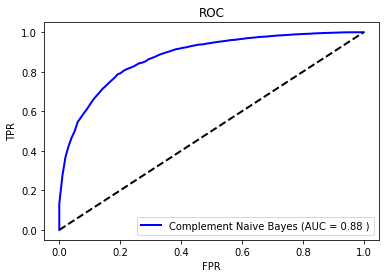

AUC: 0.8766419394209105
f1 score: 0.5877251386464561
Accuracy: 0.8108297486138524


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
mean_fpr = np.linspace(0,1,100)
tprs = []
AUC = []
F = []
accuracy = []

for train_index, val_index in skf.split(X_t, y_t):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma = best_gamma, subsample = best_subsample, colsample_bytree = best_colsample_bytree)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    xgb.fit(X_resampled, y_resampled)
    pred = xgb.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
    tprs.append(interp(mean_fpr, fpr, tpr))
    AUC.append(metrics.auc(fpr, tpr))
    pred_val = xgb.predict(X_val)
    F.append(metrics.f1_score(y_val, pred_val))
    accuracy.append(metrics.accuracy_score(y_val, pred_val))
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.concatenate([[0], mean_fpr])
mean_tpr = np.concatenate([[0], mean_tpr])
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Complement Naive Bayes (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("AUC: {}".format(np.mean(AUC)))
print("f1 score: {}".format(np.mean(F)))
print("Accuracy: {}".format(np.mean(accuracy)))

In [54]:
import pickle as pkl
pkl.dump(mean_fpr, open("XGBoost_fpr.pkl","wb"))
pkl.dump(mean_tpr, open("XGBoost_tpr.pkl","wb"))

# GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#fix some parameters
learning_rate =0.01
#n_estimator = 200
#subsample=0.8


best_AUC = 0
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)

for n_estimator in [200, 400, 600]:
    for max_depth  in [3, 5, 7, 9]:
        for min_samples_split  in [5, 25, 45]:    
            print(n_estimator, max_depth, min_samples_split)
            AUC = []
            for train_index, val_index in skf.split(X_t, y_t):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                gbdt = GradientBoostingClassifier(learning_rate = learning_rate, n_estimators = n_estimator,max_depth = max_depth,min_samples_split = min_samples_split)
                X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
                gbdt.fit(X_resampled, y_resampled)
                pred = gbdt.predict_proba(X_val)[:,1]
                fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
                AUC.append(metrics.auc(fpr, tpr))
            if np.mean(AUC)>best_AUC:
                print("Refreshed!")
                best_AUC = np.mean(AUC)
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split


200 3 5
Refreshed!
200 3 25
200 3 45
200 5 5
Refreshed!
200 5 25
Refreshed!
200 5 45
200 7 5
200 7 25
200 7 45
200 9 5
200 9 25
200 9 45
400 3 5
Refreshed!
400 3 25
400 3 45
400 5 5
400 5 25
400 5 45
400 7 5
400 7 25
400 7 45
400 9 5
400 9 25
400 9 45
600 3 5


In [58]:
print(best_AUC, best_n_estimators, best_max_depth, best_min_samples_split)

0.875947019479 200 3 45


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
skf = StratifiedKFold(n_splits=5, random_state=0)
skf.get_n_splits(X_t, y_t)
mean_fpr = np.linspace(0,1,100)
tprs = []
AUC = []
F = []
accuracy = []

for train_index, val_index in skf.split(X_t, y_t):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    xgb = XGBClassifier(learning_rate = learning_rate, n_estimators=best_n_estimators,max_depth = best_max_depth,min_child_weight = best_min_child_weight, \
                                    gamma = best_gamma, subsample = best_subsample, colsample_bytree = best_colsample_bytree)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    xgb.fit(X_resampled, y_resampled)
    pred = xgb.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=2)
    tprs.append(interp(mean_fpr, fpr, tpr))
    AUC.append(metrics.auc(fpr, tpr))
    pred_val = xgb.predict(X_val)
    F.append(metrics.f1_score(y_val, pred_val))
    accuracy.append(metrics.accuracy_score(y_val, pred_val))
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.concatenate([[0], mean_fpr])
mean_tpr = np.concatenate([[0], mean_tpr])
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Complement Naive Bayes (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("AUC: {}".format(np.mean(AUC)))
print("f1 score: {}".format(np.mean(F)))
print("Accuracy: {}".format(np.mean(accuracy)))